In [ ]:
#residual belli bir pattern izlememeli, ve genel lineara uygun olması gerekir. Bunlardan birini sağlamıyorsa bizim 
#sistemimiz linear regressiona uygun değildir. 

Metrics;

Mean Absolute Error (MAE): average absolute value of residuals 
    Bunda çıkıntı bir değer varsa eğer, karesi alındığı için, hatayı cezalandırmış oluyoruz. 
    
MSE : Square of MAE

Root Mean Squared Error (RMSE): burada birim karmaşasını elemek için kullanıyoruz. 
    yukarıdakinin birimi km2 oluyorken asıl şey km idi. Aradaki farkı elemek için bunu kullanıyorum.
    Hatanın standart sapmasıdır. Bunu yorumlaması daha kolay. 
    Bu daha yaygın kullanılır.
    
Bu metrikler bize hangi residualin iyi hangisinin kötü olduğunu gösterir. 

ML with Python

X olarak yazıoyruz featureu.

## Multiple Linear Regression and Regression Error Metrics

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

#min ve 25% arasında, max ve %75 arasında fazla uçurum olmaması lazım

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))



111.25
7.39509972887452


In [7]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

#burada verilen sayılar arasında uçurum var. BU da mean ve std a yansıyor.

257.5
255.57533136044253


In [8]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

#std is larger than mean : problematic (outlier değerler vardır)

#1. ve 3. çeyrek arasında uçurum değerler varsa buraya dikkat etmek lazım.


307.5
342.153109002388


## Distribution of features

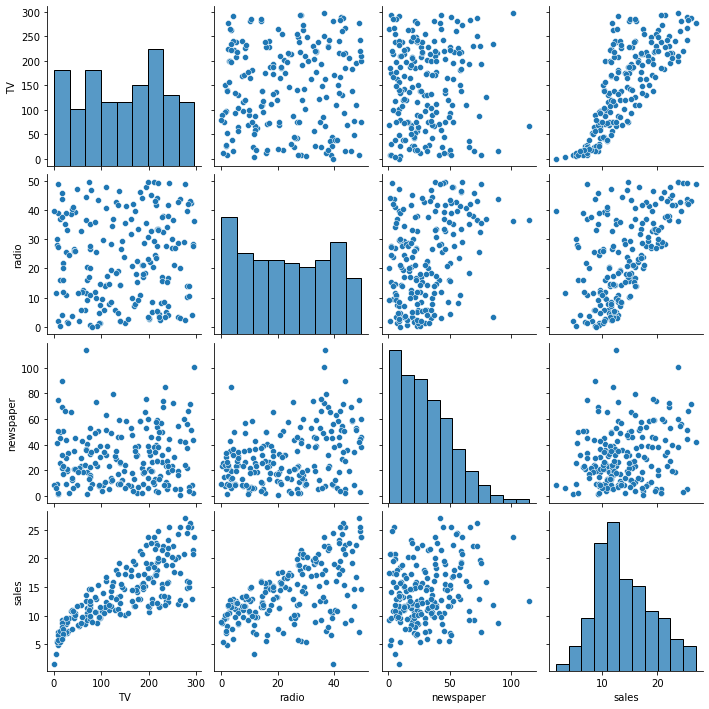

In [9]:
sns.pairplot(df);

#feature ve target arasındaki ilişkiye bakıyorum

#buradaki barplotlar ne anlatıyor?: Veri yoğunluğuna bakıyor. Ama çok önemli değil.

In [10]:
df.corr()

#target ve feature arasındaki ilişkiye bakıyorduk.
#ama burada tek feature yok. Artık Residual şeylerine bakıyorum


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


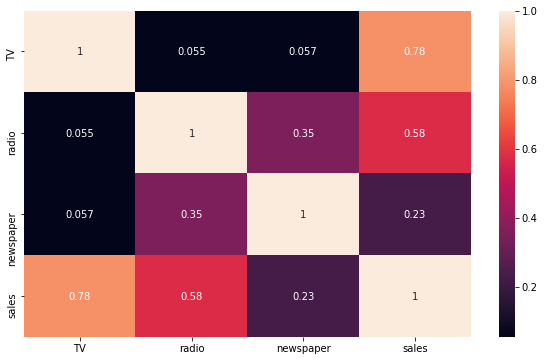

In [3]:
sns.heatmap(df.corr(), annot = True);

## Train-Test Split

In [10]:
!pip install scikit-learn

In [4]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [11]:
from sklearn.model_selection import train_test_split

#bunları ezberlemeye gerek yok. Bunlar enarda dursun sürekli alacağız.

Aslında biz bir datayı alaıp train ediyoruz. Sonrasında test ediyorum. Bulduğum bu yöntem hepsinde çalışıyor mu diye

trainin iyi olması için olabildiğince train setine max gözlem verebilmek. Çünkü o kadar çok farklı durum incelemiş olacak. Öğrencinin çok soru çözmesi gibi. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

#0.1, 0.2, 0.3 alabiliyoruz test_sizeı. Az data varsa az size alıyorum.
#ne kadar az feature varsa, o kadar az tutacağım test_sizeı

#eğer random state aynı olmazsa her seferinde farklı train ve test data alır ve sonuçlar farklı olur. bu yüzden kıyaslamak isityorsam aynı değerden yazmalıyım

In [19]:
df.sample(15) 

#train data olarak belilediğime diyorum ki;
#al bu inputu, outputa ulaşmaya çalış. Arka plandaki kuralı bul
#tabi ne kadar çok test çözerse o kadar iyi olacak. 
#yani train test sayısı yeterli miktarda olmalı.

#x-trainden aldığımız tahminler: y-pred

,TV,radio,newspaper,sales
135,48.3,47.0,8.5,11.6
96,197.6,3.5,5.9,11.7
43,206.9,8.4,26.4,12.9
47,239.9,41.5,18.5,23.2
0,230.1,37.8,69.2,22.1
112,175.7,15.4,2.4,14.1
88,88.3,25.5,73.4,12.9
76,27.5,1.6,20.7,6.9
133,219.8,33.5,45.1,19.6
64,131.1,42.8,28.9,18.0


In [ ]:
#train aldıktan sonra, test datası alıyorum. BU daha önce vermediğim sorular. ilk kez görüp 
#çizebiliyor mu diye bakacağım.

In [ ]:
#daha sonra y-prediction değeri ile y-test değerlerine bakacağım

#bunlara bakmak için r2 Mse rmse değerlerine bakıyorum

In [17]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

#%30unu aldığımı görmek için yaptım

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [18]:
X_train

#default olarak karışık geliyor train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [19]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [20]:
y_train 
#tek bi sutün olduğu için df değil

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

#instance oluştuuryoruz. Yeni bir örnek

In [14]:
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [24]:
y_pred = model.predict(X_test)
y_pred

#artık test etmeye başlıyorum
#üni sınavı aşaması

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [25]:
model.coef_

#tv,raido,newspaper model katsayılarını veriyor sırasıyla
#y-pred içinde buna ihtiyaç olduğu için buldum

array([0.04405928, 0.1992875 , 0.00688245])

In [26]:
model.intercept_
#y-pred içinde buna ihtiyaç olduğu için buldum

2.7089490925159048

# y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0

In [ ]:
sum(X_test.loc[95]*model.coef_)

In [28]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

#X_test'in ilk satırın index'i 95 olduğu için
#y_pred'in ilk değeri ile aldığım manuel değeri karşılaştırdım


16.565396297434837

In [29]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [30]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [31]:
result_sample = comparing.head(25)
result_sample

#kalabalık data istemediğim için, daha aza indirgedim

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


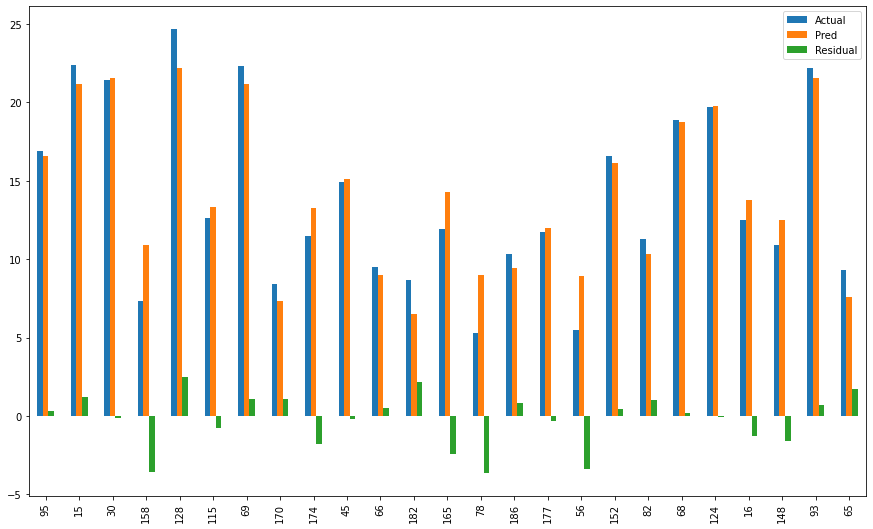

In [32]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

#%5 hata payımız vardır. Altın kuveti bilmek zorunda da değilim! :D 

#acilen satılan bir araç fiyatı ekstra düşük olabilimsi

## Error Metrics

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#genelde rmse kullanılır

In [34]:
R2_score = r2_score(y_test, y_pred)
R2_score

#%86 oranında tutarlı. sen linear reg. yapabilirsin


0.8609466508230367

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mae

#bu absorb edebiliyor. o yüzden çok güvnilir olmadı diğerlerine ihtiyaç duydum ?

1.511669222454909

In [36]:
mse = mean_squared_error(y_test, y_pred)
mse

#residualin karesini alıp topluyor. Toplam gözlem sayısına bölüyor
#ama birimler tutmuyor, target ile aynı birimde olan yeni bir metrik belirliyorlar. rmse budur işte

3.7967972367152223

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

#mse ve rmse arasında eğer uçurum varsa, modelimde hata var demektir. 
#ama eğer yakınsa modelim iyi tahminleme yapıyor demektir. 

1.9485372043446392

In [38]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [39]:
mae / sales_mean

#%10 oranında hatalı, %90 tutarlı tahminleme yapıyor ortalamada

0.10780311802138769

In [40]:
rmse / sales_mean

#daha gerçekçi çıktı hata payı

#minimize etmeye gerek var. Bize ciddi hataların olup olmadığını gösteririr ve hangi modeli seçeceğimize karar verir.


0.138957903679418

In [20]:
1-0.8609466508230367  

#R2 score ile neredeyse aynı

0.13905334917696333

## Adjusted R2 score 

In [111]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

#feature arttıkça burada yalancı bir iyileşme artış olur ama bu yalancı bir durum

#getdummies de satır değil sütun sayısı artıyor yani yalancı

#gözlem sayısnı arttırmadan feature sayısını arttırrısan yalancı bir iyileşme olur

In [112]:
adj_r2(y_test, y_pred, df)

#https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

#tavsiye makale

#%86 olan değer %85 olmuş yani çok büyük bir değişim değil. Yani yalancı değişim yok gibi
#özellikle dummies featurlar ile feature sayım çok arttıysa veya datamın orjinalinde çok fazla featura varsa bu fonksiyon ile gerçek r2 scoreunu alıyorum
#diğer datalar için bu scora bakmaya gerek yok


0.8588182832335933

## What is the concept of punishment for RMSE error metric?

In [41]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}

In [42]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [43]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

#absolute değerlerini aldım

In [44]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [45]:
#mae
df_2.residual.sum()/5 #200

200.0

In [46]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

209.76176963403032

## Evaluation Model

In [47]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
#çok temiz yazılmış, mükkk :D

In [48]:
eval_metric(y_test, y_pred)

#yukarıdaki tanımlanmış def i çağırdık

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230367
MAE 		: 1.511669222454909
MSE 		: 3.7967972367152223
RMSE 		: 1.9485372043446392


In [49]:
y_train_pred = model.predict(X_train)

#train ettiğim datayı bir de kendisi ile test ediyorum .

#train ile test yakın olmalı, yoksa memorizing gibimsi olur

In [50]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


In [ ]:
#kendi train setinde aldığı değer ile test setindeki scorlera tutarlı değilse bu ezberlemektir yani overfitting oluyor. 

## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [51]:
residuals = y_test-y_pred

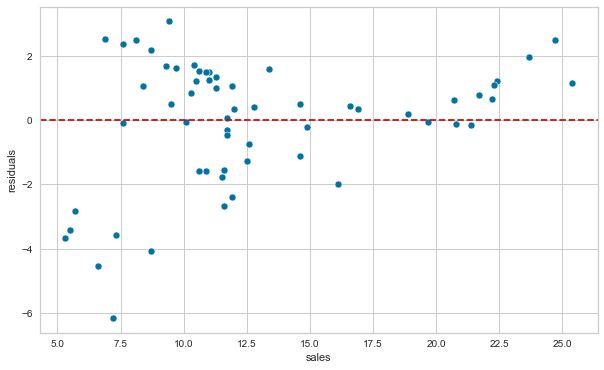

In [102]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

#ratgele dağılması lazım hem de belli bir pattern izlememesi gerekiyor.
#normal dağılıma ne kadar uygunsa, o kadar linear reg a uygundur

<AxesSubplot:xlabel='sales', ylabel='Density'>

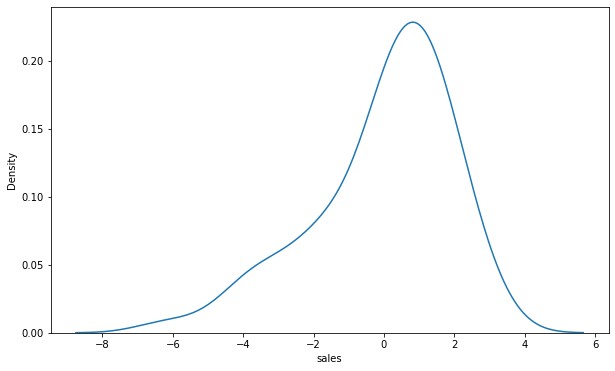

In [53]:
sns.kdeplot(residuals)

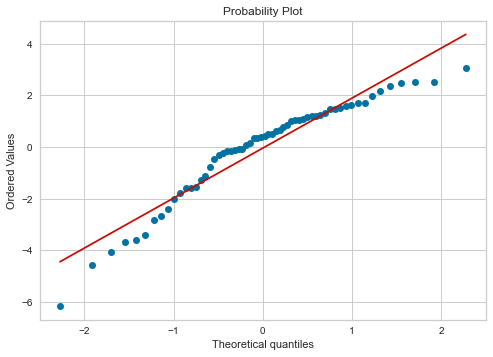

In [101]:
stats.probplot(residuals, dist ="norm", plot =plt);

#alternatif gösterim. Genelde bu kullanılıyor. Kırmızı çizginin etrafında sarmaşık gibi dolanıyorsa normal dağılıma yakın demektir.

In [55]:
from scipy.stats import skew
skew(residuals)

#skewness değerlendirmesi

-0.9865673346742734

In [56]:
#pip install yellowbrick

#hep kullanılacak. Görsellik için kullanılan bir kütüphanedir.

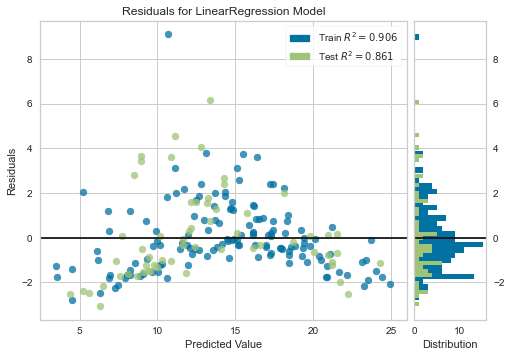

In [98]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

#???

## Prediction Error for LinearRegression

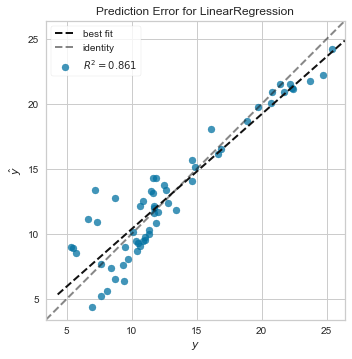

In [81]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

iki kesikli çizgi birbirine ne kadar yakınsa, modelimiz o kadar başarılıdır

## Retraining Model on Full Data

In [22]:
final_model = LinearRegression()

#ne kadar ekmek o kadar köfte, eğitim ne kadar sağlam ve çok yapılırsa o kadar iyi

In [23]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [61]:
final_model.coef_ 

#her birinin targetı nasıl etkilediğine bakıyorum
# katsayıları kullanma sebebimiz : birbirlerini nasıl etkilediklerini görmek


array([ 0.04576465,  0.18853002, -0.00103749])

In [62]:
final_model.intercept_

2.9388893694594085

In [63]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [64]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [65]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [66]:
adv = [[150, 20, 15]]

#iki boyutlu olduğunu belirtmek için çift parantez kullanırım.
#yapmazsak zaten uyarı alırız


In [67]:
adv

[[150, 20, 15]]

In [68]:
final_model.predict(adv) 

#y-pred

array([13.55862413])

In [69]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [70]:
final_model.intercept_

2.9388893694594085

In [71]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_ #y-pred

13.558624130495996

In [73]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [74]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [75]:
14.01627059 - 13.55862413

0.4576464599999994

## The effect of features on the predicted label

In [76]:
coeff_df

#hangi feature önemli hangisi önemsiz onu gösterecek

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [93]:
coeff_df.Coefficient * adv[0]

#y-pred= b1*x + b2*x + b3*x +b0 = 13.55

TV           6.864697
radio        3.770600
newspaper   -0.015562
Name: Coefficient, dtype: float64

In [79]:
6.864697 / 13.55862413

0.5062974630892729

In [80]:
3.770600 / 13.55862413

0.2780960637191142

In [83]:
-0.015562 / 13.55862413

-0.0011477565755043907